In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib nbagg

In [2]:
class Sigmoid_logistic:
    def val(self,x):
        return (1 + np.tanh(x/2))/2
    def inv(self,x):
        return 2*np.arctanh(2*x-1)
    def der(self,x):
        x = np.tanh(x/2)
        return (1-x*x)/4
    
class Sigmoid_hyperbolic:
    def val(self,x):
        return (1 + np.tanh(x))/2
    def inv(self,x):
        return np.arctanh(2*x-1)
    def der(self,x):
        x = np.tanh(x)
        return (1-x*x)/2
    
class Sigmoid_gaussian:
    def val(self,x):
        return (1 + sp.erf(x))/2
    def inv(self,x):
        return sp.erfinv(2*x-1)
    def der(self,x):
        return np.exp(-x*x)/np.sqrt(np.pi)
    
class Sigmoid_gumbel:
    def val(self,x):
        return np.exp(-np.exp(-x))
    def inv(self,x):
        return -np.log(-np.log(x))
    def der(self,x):
        return np.exp(-x - np.exp(-x))
    
class Sigmoid_weibull:
    def __init__(self,shape=1):
        self.shape = shape
    def pow(self,x):
        return np.power(x,self.shape)
    def val(self,x):
        y = 1 - np.exp(-self.pow(x))
        y[x <= 0] = 0
        return y
    def inv(self,x):
        x = np.log(1/(1-x))
        return np.power(x,1/self.shape)
    def der(self,x):
        y = self.shape*np.power(x,self.shape-1)*np.exp(-self.pow(x))
        y[x <= 0] = 0
        return y

Sh = Sigmoid_hyperbolic()
Sn = Sigmoid_gaussian()
Sg = Sigmoid_gumbel()
Sw = Sigmoid_weibull()

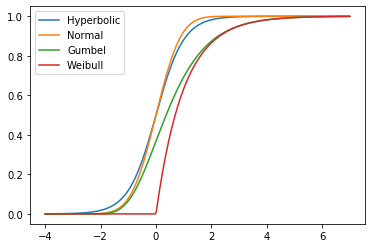

In [3]:
x = np.linspace(-4,7,300)
yh = Sh.val(x)
yn = Sn.val(x)
yg = Sg.val(x)
yw = Sw.val(x)

plt.plot(x,yh)
plt.plot(x,yn)
plt.plot(x,yg)
plt.plot(x,yw)

plt.gca().legend(['Hyperbolic','Normal','Gumbel','Weibull'])

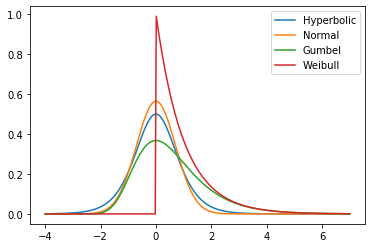

In [4]:
x = np.linspace(-4,7,300)
yh = Sh.der(x)
yn = Sn.der(x)
yg = Sg.der(x)
yw = Sw.der(x)

plt.plot(x,yh)
plt.plot(x,yn)
plt.plot(x,yg)
plt.plot(x,yw)

plt.gca().legend(['Hyperbolic','Normal','Gumbel','Weibull'])